## 2 - Size Analysis
## Table of Contents
<ul>
<li><a href="#1">Finding Segments Size</a></li>
<li><a href="#2">Finding Fractures Size</a></li>
<li><a href="#3">Histogram of Count of Segments vs Size</a></li>
</ul>

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

<a id='1'></a>
## Finding Segments Size

### Split Fractures dataset into segments dataset

In [2]:
df_fractures = pd.read_csv("./output/df_fractures_1.csv")

df_fractures.head()

,fracture_id,segments,segments_color,segments_width,Xmin,Xmax,Ymin,Ymax,fracture_height,fracture_length,fracture_direction
0,0,"2799.9979,2886.5779,2715.0032,2797.5709,2704.0...",yellow,3,2704.0042,2799.9979,2726.5764,2886.5779,160.0015,95.9937,Vertical
1,1,"2857.0003,2830.5703,2759.9982,2772.5739,2755.0...",blue,3,2755.0029,2857.0003,2736.5771,2830.5703,93.9932,101.9974,Horizontal
2,2,"2612.9964,2824.5755,2708.7733,2805.8089",blue,3,2612.9964,2708.7733,2805.8089,2824.5755,18.7666,95.7769,Horizontal
3,3,"2655.0037,2794.5735,2613.9955,2756.5784",blue,3,2613.9955,2655.0037,2756.5784,2794.5735,37.9951,41.0082,Horizontal
4,4,"3004.443,2762.0149,3084.76,2774.2514,3121.4356...",blue,3,3004.4430,3121.4356,2762.0149,2778.0103,15.9954,116.9926,Horizontal


In [3]:
# create a new dataframe to split the fracture into segments and save each segment coordinates in one row
df_segments = pd.DataFrame(columns=['fracture_id', 'segment_id', 'X1', 'Y1', 'X2', 'Y2', 'delta_X', 'delta_Y'])

df_segments

,fracture_id,segment_id,X1,Y1,X2,Y2,delta_X,delta_Y


<img src="in_cell_images/df_fractures_df_segments.png">

In [4]:
# iterate the first dataframe (df_fractures), extract each segment and insert as a new row into the new datafram (df_segments)

for index, row in df_fractures.iterrows():

    s_segment = row['segments']

    fracture_id = row['fracture_id']

    # Converting the string to list
    l_segment = s_segment.split(",")

    counter=0

    # Insert each x,y pair as new row to the new dataframe (df_segments)
    for x in range(0, (len(l_segment) - 3), 2):
        counter += 1
        X1, Y1, X2, Y2 = float(l_segment[x]), float(l_segment[x+1]), float(l_segment[x+2]), float(l_segment[x+3])
        #print (X1, Y1, X2, Y2)
        
        # calculate run(delta X) and rise(delta Y)
        run = X2 - X1
        rise = Y2 - Y1
        #print ("run (delta X): "+str(run)+", rise (delta Y): "+str(rise))

        # Appending X1, Y1, X2, Y2, run, rise
        new_row = pd.DataFrame({'fracture_id':fracture_id, 'segment_id':str(fracture_id)+'_'+str(counter), 'X1':X1, 'Y1':Y1, 'X2':X2, 'Y2':Y2, 'delta_X':run, 'delta_Y':rise}, index=[0])
        df_segments = pd.concat([new_row,df_segments.loc[:]]).reset_index(drop=True)

In [5]:
df_segments.head()

,fracture_id,segment_id,X1,Y1,X2,Y2,delta_X,delta_Y
0,1528,1528_2,14880.257,8797.5608,14890.307,8777.9108,10.05,-19.65
1,1528,1528_1,14872.006,8806.2608,14880.257,8797.5608,8.251,-8.7
2,1527,1527_4,20349.119,3322.3508,20357.025,3323.7462,7.906,1.3954
3,1527,1527_3,20350.282,3311.8852,20349.119,3322.3508,-1.163,10.4656
4,1527,1527_2,20338.188,3311.4201,20350.282,3311.8852,12.094,0.4651


### Calculate the segment size

<img src="in_cell_images/pythagorean.png">

In [6]:
df_segments["segment_size"] = None

In [7]:
# Iterating the dataframe of segments and calculating hypotenuse (segment size) using Pythagoreas theorem
for index, row in df_segments.iterrows():

    delta_X = row["delta_X"]
    delta_Y = row["delta_Y"]
    #print("delta X: ", delta_X, "delta Y: ", delta_Y)
    hypotenuse = math.sqrt(delta_X ** 2 + delta_Y ** 2)
    #print(hypotenuse)
    
    df_segments.loc[index, 'segment_size'] = hypotenuse

In [8]:
df_segments.head()

,fracture_id,segment_id,X1,Y1,X2,Y2,delta_X,delta_Y,segment_size
0,1528,1528_2,14880.257,8797.5608,14890.307,8777.9108,10.05,-19.65,22.070908
1,1528,1528_1,14872.006,8806.2608,14880.257,8797.5608,8.251,-8.7,11.990371
2,1527,1527_4,20349.119,3322.3508,20357.025,3323.7462,7.906,1.3954,8.028199
3,1527,1527_3,20350.282,3311.8852,20349.119,3322.3508,-1.163,10.4656,10.530021
4,1527,1527_2,20338.188,3311.4201,20350.282,3311.8852,12.094,0.4651,12.10294


In [9]:
# save dataframe to csv
df_segments.to_csv('./output/df_segments_1.csv', index=False)

<a id='2'></a>
## Finding Fractures Size

In [10]:
for index, row in df_fractures.iterrows():
    fracture_id = row['fracture_id']

    total_size = df_segments[df_segments.fracture_id == fracture_id].segment_size.sum()

    # just to fix one fracture (false annotation)
    if total_size < 1:
        total_size = 1

    df_fractures.loc[df_fractures.fracture_id == fracture_id, 'total_size'] = total_size


In [11]:
df_fractures.head()

,fracture_id,segments,segments_color,segments_width,Xmin,Xmax,Ymin,Ymax,fracture_height,fracture_length,fracture_direction,total_size
0,0,"2799.9979,2886.5779,2715.0032,2797.5709,2704.0...",yellow,3,2704.0042,2799.9979,2726.5764,2886.5779,160.0015,95.9937,Vertical,194.911960
1,1,"2857.0003,2830.5703,2759.9982,2772.5739,2755.0...",blue,3,2755.0029,2857.0003,2736.5771,2830.5703,93.9932,101.9974,Horizontal,149.359400
2,2,"2612.9964,2824.5755,2708.7733,2805.8089",blue,3,2612.9964,2708.7733,2805.8089,2824.5755,18.7666,95.7769,Horizontal,97.598155
3,3,"2655.0037,2794.5735,2613.9955,2756.5784",blue,3,2613.9955,2655.0037,2756.5784,2794.5735,37.9951,41.0082,Horizontal,55.904383
4,4,"3004.443,2762.0149,3084.76,2774.2514,3121.4356...",blue,3,3004.4430,3121.4356,2762.0149,2778.0103,15.9954,116.9926,Horizontal,118.111506


In [12]:
# save dataframe to csv
df_fractures.to_csv('./output/df_fractures_2.csv', index=False)

<a id='3'></a>
## Histogram of Count of Segments vs Size

In [13]:
min_segment_size = df_segments.segment_size.min()
max_segment_size = df_segments.segment_size.max()

In [14]:
number_of_bins = 30
bin_edges_segment_size = np.linspace(min_segment_size, max_segment_size, number_of_bins+1) 
print(bin_edges_segment_size)

[  0.          10.43577846  20.87155691  31.30733537  41.74311383
  52.17889228  62.61467074  73.0504492   83.48622765  93.92200611
 104.35778457 114.79356303 125.22934148 135.66511994 146.1008984
 156.53667685 166.97245531 177.40823377 187.84401222 198.27979068
 208.71556914 219.15134759 229.58712605 240.02290451 250.45868296
 260.89446142 271.33023988 281.76601833 292.20179679 302.63757525
 313.0733537 ]


### Histogram Values

In [15]:
pd.cut(x=df_segments['segment_size'], bins=bin_edges_segment_size).value_counts().sort_index().head()

(0.0, 10.436]       385
(10.436, 20.872]    964
(20.872, 31.307]    783
(31.307, 41.743]    447
(41.743, 52.179]    268
Name: segment_size, dtype: int64

### Bar Histogram

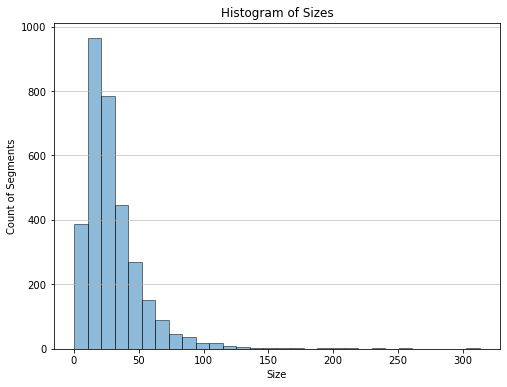

In [16]:
plt.figure(figsize=(8, 6))

ax = df_segments.segment_size.plot.hist(bins=number_of_bins, alpha=0.5, histtype='bar', ec='black')

plt.grid(axis='y', alpha=0.75)

#plt.xticks(bin_edges_segment_size)

# set chart title
ax.set_title('Histogram of Sizes')
# set x, y axes labels
ax.set_xlabel("Size")
ax.set_ylabel("Count of Segments")

plt.show()